<a href="https://colab.research.google.com/github/Tarinibo/Cognifyz-project-/blob/main/CognifyzLEVEL2_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEVEL TWO: TASK 1

## Task: Table Booking and Online Delivery

- [ ] Determine the percentage of restaurants that offer table booking and online delivery.
- [ ] Compare the average ratings of restaurants with table booking and those without.
- [ ] Analyze the availability of online delivery among restaurants with different price ranges.


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/drive/Othercomputers/My Laptop/Desktop/Dataset.csv")

In [5]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


## Determine the percentage of restaurants that offer table booking and online delivery.

In [6]:
# Count restaurants with and without table booking
table_booking_counts = df["Has Table booking"].value_counts(normalize=True) * 100

# Display results
print("Percentage of Restaurants Offering Table Booking:")
print(table_booking_counts)

Percentage of Restaurants Offering Table Booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64


 ## Compare the average ratings of restaurants with table booking and those without.

In [7]:
# Count restaurants with and without online delivery
online_delivery_counts = df["Has Online delivery"].value_counts(normalize=True) * 100

# Display results
print("Percentage of Restaurants Offering Online Delivery:")
print(online_delivery_counts)

Percentage of Restaurants Offering Online Delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


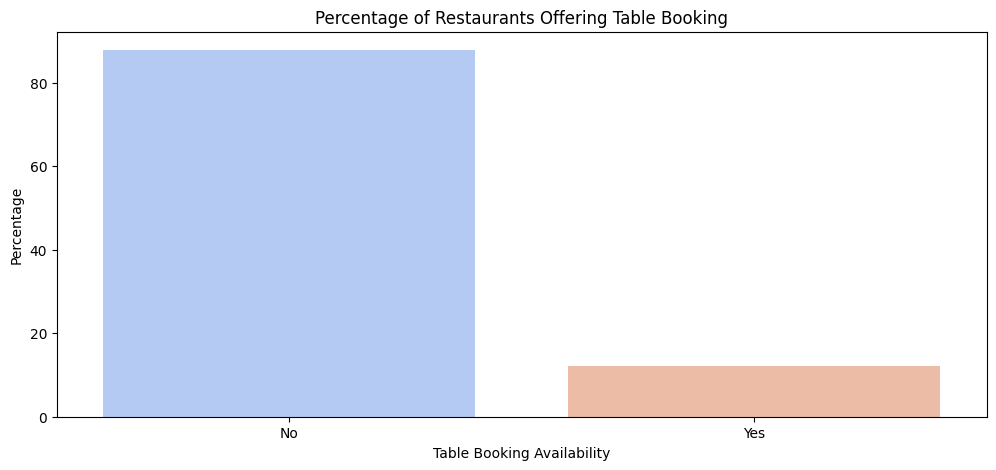

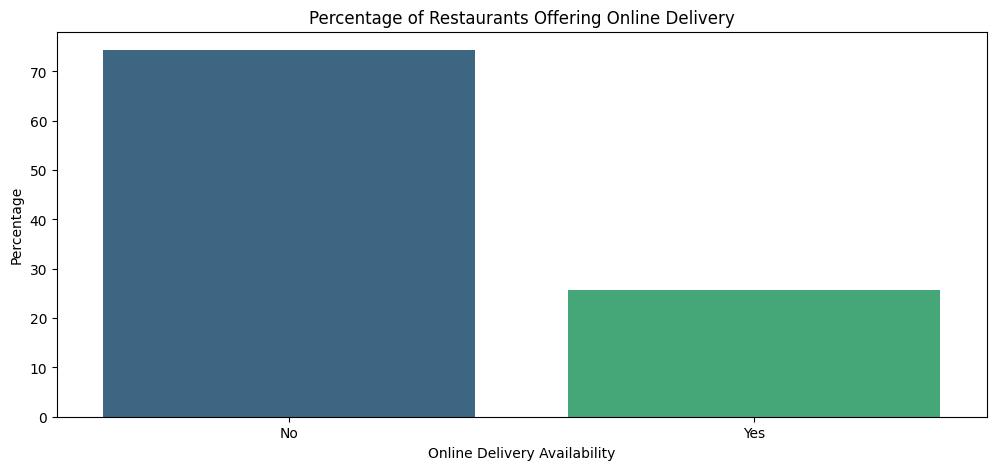

In [10]:
# Create a bar chart for table booking
plt.figure(figsize=(12, 5))
sns.barplot(
            x=table_booking_counts.index,
            y=table_booking_counts.values,
            hue=table_booking_counts.index,
            palette="coolwarm")
legend=False
plt.xlabel("Table Booking Availability")
plt.ylabel("Percentage")
plt.title("Percentage of Restaurants Offering Table Booking")
plt.show()

# Create a bar chart for online delivery
plt.figure(figsize=(12, 5))
sns.barplot(
    x=online_delivery_counts.index,
    y=online_delivery_counts.values,
    hue=online_delivery_counts.index,
    palette="viridis")
legend=False
plt.xlabel("Online Delivery Availability")
plt.ylabel("Percentage")
plt.title("Percentage of Restaurants Offering Online Delivery")
plt.show()

## Insights
- [ ] a high percentage of restaurants offer table booking indicate a preference for dine-in experiences.
- [ ] online delivery is widely available suggests a strong online food delivery culture in that region.
Comparing both metrics can help identify trends in restaurant service models.

In [11]:
# Group by 'Has Table booking' and calculate the mean rating
avg_rating_table_booking = df.groupby("Has Table booking")["Aggregate rating"].mean()

# Display results
print("Average Ratings for Restaurants With and Without Table Booking:")
print(avg_rating_table_booking)

Average Ratings for Restaurants With and Without Table Booking:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


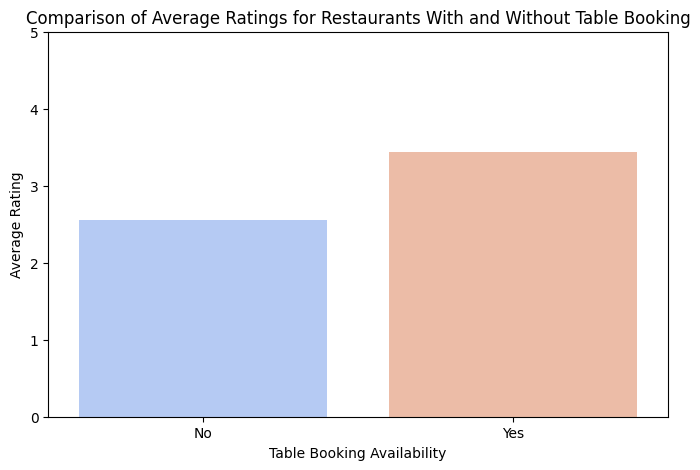

In [12]:
# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_table_booking.index, y=avg_rating_table_booking.values, hue= avg_rating_table_booking.index, palette="coolwarm")
plt.xlabel("Table Booking Availability")
plt.ylabel("Average Rating")
plt.title("Comparison of Average Ratings for Restaurants With and Without Table Booking")
plt.ylim(0, 5)  # Assuming ratings are on a 0-5 scale
plt.show()

## Insights
→ This indicates that higher-end or more customer-focused restaurants offer table reservations


## Analyze the availability of online delivery among restaurants with different price ranges.

In [13]:
# Count restaurants offering online delivery across different price ranges
delivery_distribution = df.groupby("Price range")["Has Online delivery"].value_counts(normalize=True).unstack() * 100

# Display results
print("Percentage of Restaurants Offering Online Delivery by Price Range:")
print(delivery_distribution)

Percentage of Restaurants Offering Online Delivery by Price Range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


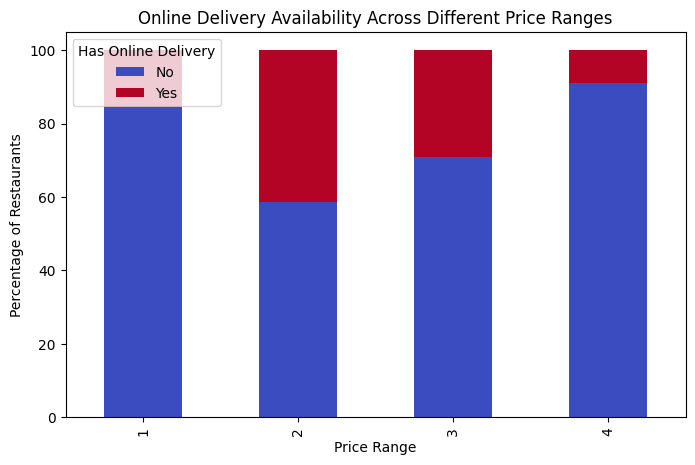

## Insights: Higher price range restaurants have lower online delivery availability → Premium restaurants may focus more on dine-in experiences


In [15]:
# Create a stacked bar chart
delivery_distribution.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")

# Labels and title
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.title("Online Delivery Availability Across Different Price Ranges")
plt.legend(title="Has Online Delivery", labels=["No", "Yes"])
plt.show()

print("## Insights: Higher price range restaurants have lower online delivery availability → Premium restaurants may focus more on dine-in experiences")